In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import defaultdict

In [30]:
X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, n_redundant=5, n_classes=2, flip_y=0.1, random_state=42)

df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

print("Dataset shape:", df.shape)
print("First 5 records of the dataset:")
print(df.head())


Dataset shape: (5000, 21)
First 5 records of the dataset:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -4.144491  -1.548530  -1.401018  -1.352255   0.201241   3.126670   
1  -0.938382  -1.767413   1.456918  -4.040927  -0.647053  -1.896509   
2   1.196222  -0.485535  -2.178524   4.194491   0.754795  -3.931640   
3   1.959588  -0.058673  -2.014241  -0.371775  -0.095026   0.022702   
4   2.352839  -0.795217  -1.442363  -2.458134   0.148025  -4.244310   

   feature_6  feature_7  feature_8  feature_9  ...  feature_11  feature_12  \
0  -0.882656   0.850497   1.708640  -6.389422  ...    2.171172    4.509334   
1  -1.548514   1.222373   0.258521  -5.839147  ...   -2.329862    8.175741   
2  -0.497388   1.676860   1.778102   4.948676  ...   -2.937623   -2.184437   
3  -1.508727  -1.648014   0.664927   5.318073  ...    2.794645   -3.071184   
4  -0.651979   0.871309   3.181241   7.782901  ...    1.271400   -2.681825   

   feature_13  feature_14  feature_15  feature

In [31]:
X_train_2way, X_test_2way, y_train_2way, y_test_2way = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train_2way.shape}")
print(f"y_train shape: {y_train_2way.shape}")
print(f"X_test shape: {X_test_2way.shape}")
print(f"y_test shape: {y_test_2way.shape}")

X_train shape: (4000, 20)
y_train shape: (4000,)
X_test shape: (1000, 20)
y_test shape: (1000,)


In [32]:
X_train_3way, X_temp_3way, y_train_3way, y_temp_3way = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_val_3way, X_test_3way, y_val_3way, y_test_3way = train_test_split(X_temp_3way, y_temp_3way, test_size=0.5, random_state=42, stratify=y_temp_3way)

print(f"X_train: {X_train_3way.shape}")
print(f"y_train: {y_train_3way.shape}")
print(f"X_val: {X_val_3way.shape}")
print(f"y_val: {y_val_3way.shape}")
print(f"X_test: {X_test_3way.shape}")
print(f"y_test: {y_test_3way.shape}")


X_train: (3000, 20)
y_train: (3000,)
X_val: (1000, 20)
y_val: (1000,)
X_test: (1000, 20)
y_test: (1000,)


In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("\nK-Folds Split:")
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold = X[train_index], X[test_index]
    y_train_kfold, y_test_kfold = y[train_index], y[test_index]
    print(f"Fold {fold+1} - Train set shape: {X_train_kfold.shape}, Test set shape: {X_test_kfold.shape}")


K-Folds Split:
Fold 1 - Train set shape: (4000, 20), Test set shape: (1000, 20)
Fold 2 - Train set shape: (4000, 20), Test set shape: (1000, 20)
Fold 3 - Train set shape: (4000, 20), Test set shape: (1000, 20)
Fold 4 - Train set shape: (4000, 20), Test set shape: (1000, 20)
Fold 5 - Train set shape: (4000, 20), Test set shape: (1000, 20)


In [34]:
print("Two-Way Split Classification\n")
model_2way= LogisticRegression(random_state=42, solver='liblinear')
model_2way.fit(X_train_2way, y_train_2way)

y_pred_2way= model_2way.predict(X_test_2way)
accuracy_2way= accuracy_score(y_test_2way, y_pred_2way)
precision_2way= precision_score(y_test_2way, y_pred_2way)
recall_2way= recall_score(y_test_2way, y_pred_2way)
f1_2way= f1_score(y_test_2way, y_pred_2way)

print(f"Test Accuracy: {accuracy_2way:.4f}")
print(f"Test Precision: {precision_2way:.4f}")
print(f"Test Recall: {recall_2way:.4f}")
print(f"Test F1 Score: {f1_2way:.4f}")
print("-"*50)

print("\nThree-Way Split Classification\n")
model_3way= LogisticRegression(random_state=42, solver='liblinear')
model_3way.fit(X_train_3way, y_train_3way)

y_pred_val= model_3way.predict(X_val_3way)
accuracy_val= accuracy_score(y_val_3way, y_pred_val)
precision_val= precision_score(y_val_3way, y_pred_val)
recall_val= recall_score(y_val_3way, y_pred_val)
f1_val= f1_score(y_val_3way, y_pred_val)

print(f"Validation Accuracy: {accuracy_val:.4f}")
print(f"Validation Precision: {precision_val:.4f}")
print(f"Validation Recall: {recall_val:.4f}")
print(f"Validation F1 Score: {f1_val:.4f}")

y_pred_test_3way= model_3way.predict(X_test_3way)
accuracy_test_3way= accuracy_score(y_test_3way, y_pred_test_3way)
precision_test_3way= precision_score(y_test_3way, y_pred_test_3way)
recall_test_3way= recall_score(y_test_3way, y_pred_test_3way)
f1_test_3way= f1_score(y_test_3way, y_pred_test_3way)

print(f"\nTest Accuracy: {accuracy_test_3way:.4f}")
print(f"Test Precision: {precision_test_3way:.4f}")
print(f"Test Recall: {recall_test_3way:.4f}")
print(f"Test F1 Score: {f1_test_3way:.4f}")
print("-"*50)

print("\nK-Folds Cross-Validation\n")
fold_accuracies= []
fold_precisions= []
fold_recalls= []
fold_f1_scores= []
all_y_true= []
all_y_pred= []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_kfold, X_test_kfold= X[train_index], X[test_index]
    y_train_kfold, y_test_kfold= y[train_index], y[test_index]

    model_kfold= LogisticRegression(random_state=42, solver='liblinear')
    model_kfold.fit(X_train_kfold, y_train_kfold)
    y_pred_kfold= model_kfold.predict(X_test_kfold)

    fold_accuracies.append(accuracy_score(y_test_kfold, y_pred_kfold))
    fold_precisions.append(precision_score(y_test_kfold, y_pred_kfold))
    fold_recalls.append(recall_score(y_test_kfold, y_pred_kfold))
    fold_f1_scores.append(f1_score(y_test_kfold, y_pred_kfold))

    all_y_true.extend(y_test_kfold)
    all_y_pred.extend(y_pred_kfold)

print(f"Average K-Fold Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Average K-Fold Precision: {np.mean(fold_precisions):.4f}")
print(f"Average K-Fold Recall: {np.mean(fold_recalls):.4f}")
print(f"Average K-Fold F1-Score: {np.mean(fold_f1_scores):.4f}")

Two-Way Split Classification

Test Accuracy: 0.7800
Test Precision: 0.7862
Test Recall: 0.7606
Test F1 Score: 0.7732
--------------------------------------------------

Three-Way Split Classification

Validation Accuracy: 0.7970
Validation Precision: 0.8021
Validation Recall: 0.7809
Validation F1 Score: 0.7914

Test Accuracy: 0.8230
Test Precision: 0.8185
Test Recall: 0.8235
Test F1 Score: 0.8210
--------------------------------------------------

K-Folds Cross-Validation

Average K-Fold Accuracy: 0.8090
Average K-Fold Precision: 0.8074
Average K-Fold Recall: 0.8053
Average K-Fold F1-Score: 0.8059


In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


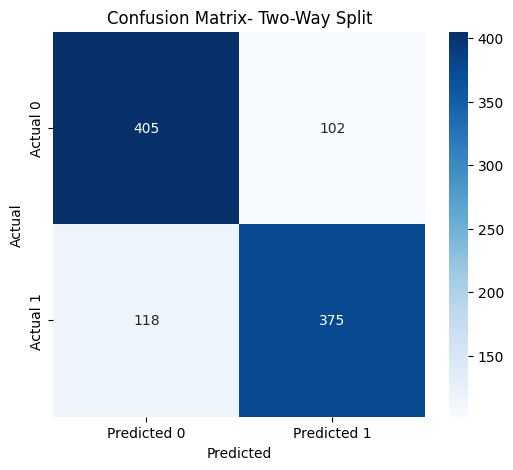

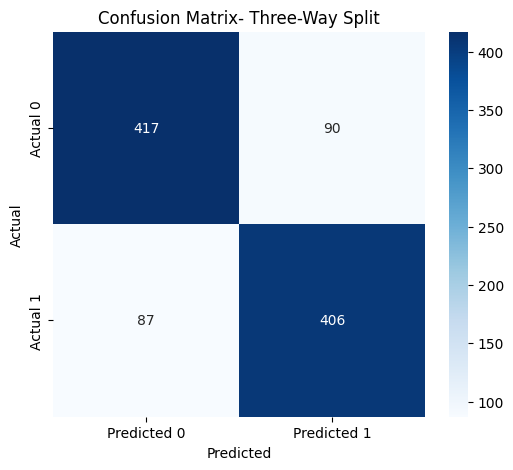

In [37]:
plot_confusion_matrix(y_test_2way, y_pred_2way, "Confusion Matrix- Two-Way Split")
plot_confusion_matrix(y_test_3way, y_pred_test_3way, "Confusion Matrix- Three-Way Split")

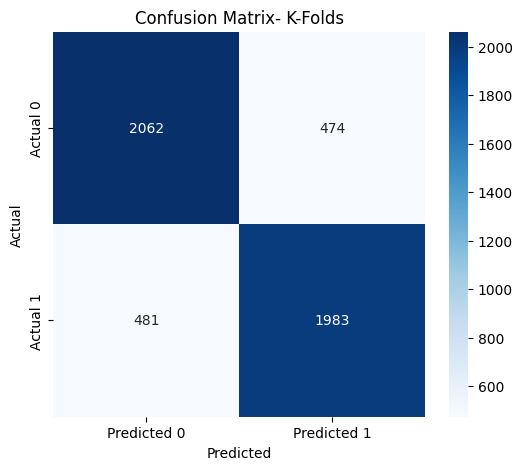

In [38]:
plot_confusion_matrix(all_y_true, all_y_pred, "Confusion Matrix- K-Folds")

In [40]:
from sklearn.metrics import classification_report

In [41]:
report_dict = classification_report(y_test_2way, y_pred_2way, output_dict=True)
print(pd.DataFrame(report_dict).T)

              precision    recall  f1-score  support
0              0.774379  0.798817  0.786408   507.00
1              0.786164  0.760649  0.773196   493.00
accuracy       0.780000  0.780000  0.780000     0.78
macro avg      0.780271  0.779733  0.779802  1000.00
weighted avg   0.780189  0.780000  0.779894  1000.00


In [42]:
report_dict = classification_report(y_test_3way, y_pred_test_3way, output_dict=True)
print(pd.DataFrame(report_dict).T)

              precision    recall  f1-score   support
0              0.827381  0.822485  0.824926   507.000
1              0.818548  0.823529  0.821031   493.000
accuracy       0.823000  0.823000  0.823000     0.823
macro avg      0.822965  0.823007  0.822979  1000.000
weighted avg   0.823026  0.823000  0.823006  1000.000


In [43]:
report_dict = classification_report(all_y_true, all_y_pred, output_dict=True)
print(pd.DataFrame(report_dict).T)

              precision    recall  f1-score   support
0              0.810853  0.813091  0.811971  2536.000
1              0.807082  0.804789  0.805934  2464.000
accuracy       0.809000  0.809000  0.809000     0.809
macro avg      0.808968  0.808940  0.808952  5000.000
weighted avg   0.808995  0.809000  0.808996  5000.000
